In [1]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 275 kB/s 
     |████████████████████████████████| 6.4 MB 11.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2010-01-01'
end = '2021-12-31'

df = yf.download('AAPL', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546383,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473096,447610800


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,175.797394,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.836319,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.799164,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.888916,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,177.712143,59773000


In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.535085,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.546383,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.442255,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.430346,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.473096,447610800


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1 )
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


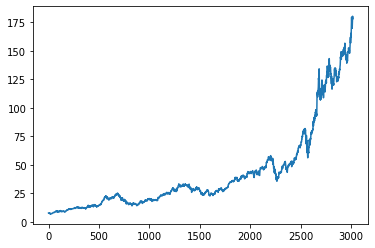

In [9]:
plt.plot(df.Close)

In [11]:
ma7 = df.Close.rolling(7).mean()
ma7

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3015    173.908572
3016    174.055714
3017    175.060000
3018    176.237143
3019    177.444286
Name: Close, Length: 3020, dtype: float64

In [12]:
ma21 = df.Close.rolling(21).mean()
ma21

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3015    169.889524
3016    170.765238
3017    171.835714
3018    172.747143
3019    173.361428
Name: Close, Length: 3020, dtype: float64

In [15]:
ma100 = df.Close.rolling(100).mean()

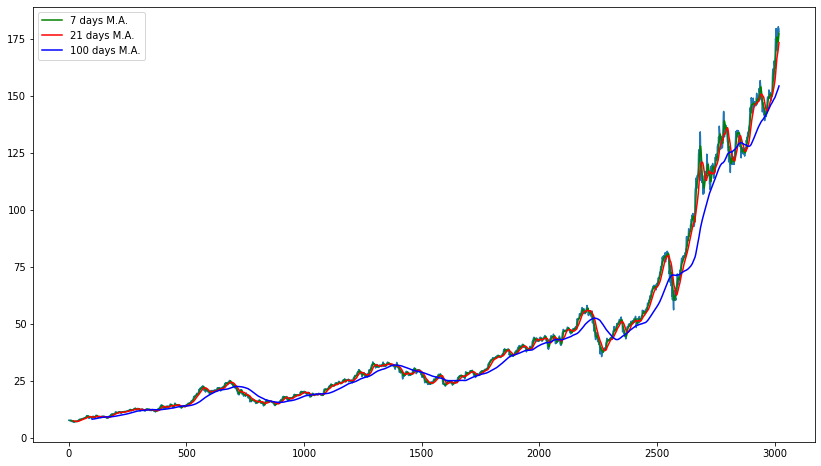

In [19]:
plt.figure(figsize = (14,8))
plt.plot(df.Close)
plt.plot(ma7, 'g', label='7 days M.A.')
plt.plot(ma21, 'r', label='21 days M.A.')
plt.plot(ma100, 'b', label='100 days M.A.')
plt.legend(loc="upper left")

In [20]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()

In [21]:
df.head()

,Open,High,Low,Close,Volume,MACD,Signal line
0,7.622500,7.660714,7.585000,7.643214,493729600,0.000000,0.000000
1,7.664286,7.699643,7.616071,7.656429,601904800,0.001054,0.000211
2,7.656429,7.686786,7.526786,7.534643,552160000,-0.007847,-0.001401
3,7.562500,7.571429,7.466071,7.520714,477131200,-0.015843,-0.004289
4,7.510714,7.571429,7.466429,7.570714,447610800,-0.017938,-0.007019


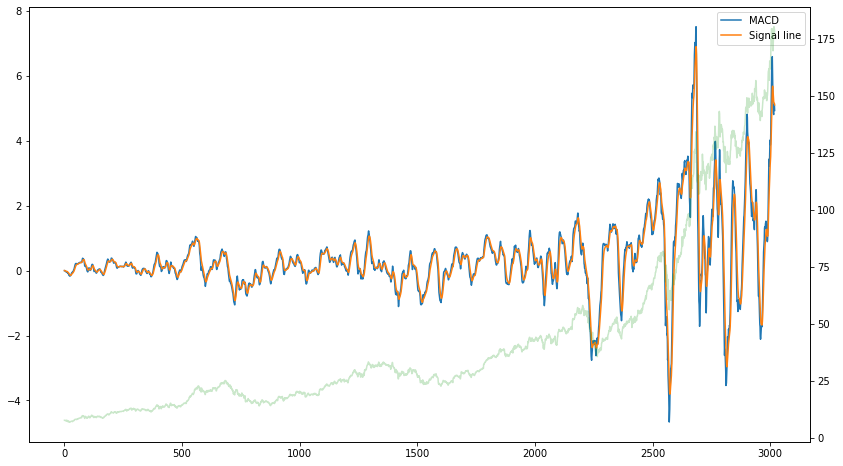

In [23]:
fig, ax = plt.subplots(figsize = (14,8))
df[['MACD', 'Signal line']].plot(ax=ax)
df['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

In [24]:
df.shape

(3020, 7)

In [26]:
#Splitting data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2114, 1)
(906, 1)


In [27]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [29]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [31]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0192931 ],
       [0.01961817],
       [0.01662229],
       ...,
       [0.98966821],
       [0.98837669],
       [0.9910212 ]])

In [33]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train.shape

(2014, 100, 1)

In [37]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [41]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 23s 275ms/step - loss: 0.0105
Epoch 2/50
63/63 [==============================] - 17s 275ms/step - loss: 0.0061
Epoch 3/50
63/63 [==============================] - 17s 276ms/step - loss: 0.0056
Epoch 4/50
63/63 [==============================] - 17s 275ms/step - loss: 0.0053
Epoch 5/50
63/63 [==============================] - 17s 275ms/step - loss: 0.0046
Epoch 6/50
63/63 [==============================] - 17s 276ms/step - loss: 0.0048
Epoch 7/50
63/63 [==============================] - 17s 275ms/step - loss: 0.0050
Epoch 8/50
63/63 [==============================] - 17s 274ms/step - loss: 0.0045
Epoch 9/50
63/63 [==============================] - 17s 274ms/step - loss: 0.0039
Epoch 10/50
63/63 [==============================] - 17s 274ms/step - loss: 0.0040
Epoch 11/50
63/63 [==============================] - 17s 277ms/step - loss: 0.0039
Epoch 12/50
63/63 [==============================] - 17s 276ms/step - loss: 0.0040
Epoch 13/50
6

In [42]:
model.save('keras_LSTM_model.h5')

In [43]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [44]:
past_100_days = data_training.tail(100)

In [45]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [46]:
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [47]:
input_data = scaler.fit_transform(final_df)

In [49]:
input_data.shape

(1006, 1)

In [50]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [51]:
# Making Prediction
y_predicted = model.predict(x_test)

In [52]:
y_predicted.shape

(906, 1)

In [53]:
scaler.scale_

array([0.00690691])

In [54]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

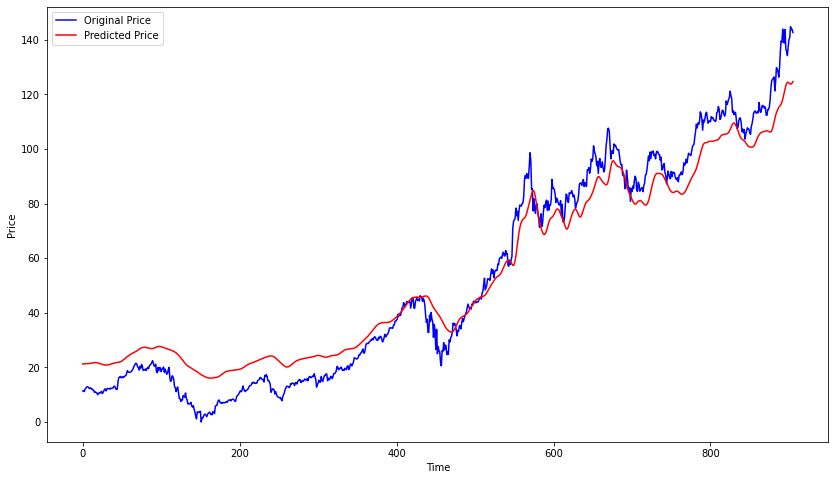

In [55]:
plt.figure(figsize=(14,8))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Above plot shows how good our LSTM models captured Apple stock trend.